In [10]:
#Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold


df = pd.read_csv('final_data.csv')

## ANN
Predicting Net Savings

In [7]:
data = df

# Use all variables except 'NetSavings' as features
X = data.drop(columns=['NetSavings'])  # Drop the target column
y = data['NetSavings']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the regression-specific ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-03 02:16:17.065080: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 61505256.0000 - mae: 5542.7847 - val_loss: 47289460.0000 - val_mae: 4544.3755
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39907532.0000 - mae: 4087.9321 - val_loss: 28365622.0000 - val_mae: 3810.7529
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 27367488.0000 - mae: 3694.2615 - val_loss: 26116406.0000 - val_mae: 3687.5557
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 26423206.0000 - mae: 3586.6497 - val_loss: 24001598.0000 - val_mae: 3529.8203
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 27167934.0000 - mae: 3465.3286 - val_loss: 22053660.0000 - val_mae: 3341.3247
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 23192518.0000 - mae: 3264.5537 - val_loss: 20371700.0000 - val_mae: 3184.9741
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 22009058.0000 - mae: 3026.3809 - val_loss: 19058414.0000 - val_mae: 3046.6675
Epoch 8/50
400/400 ━━━━━

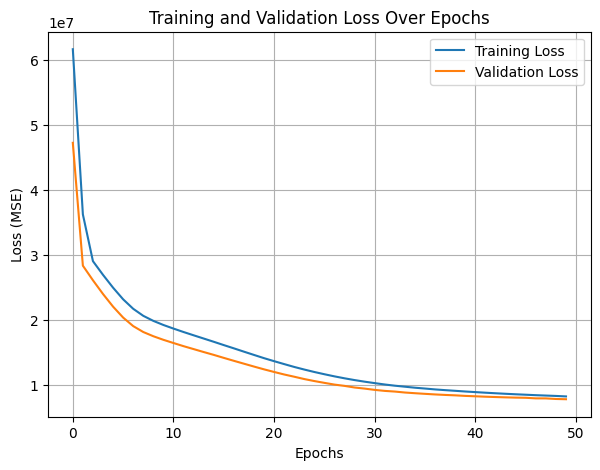

In [8]:
# Plot training and validation loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()


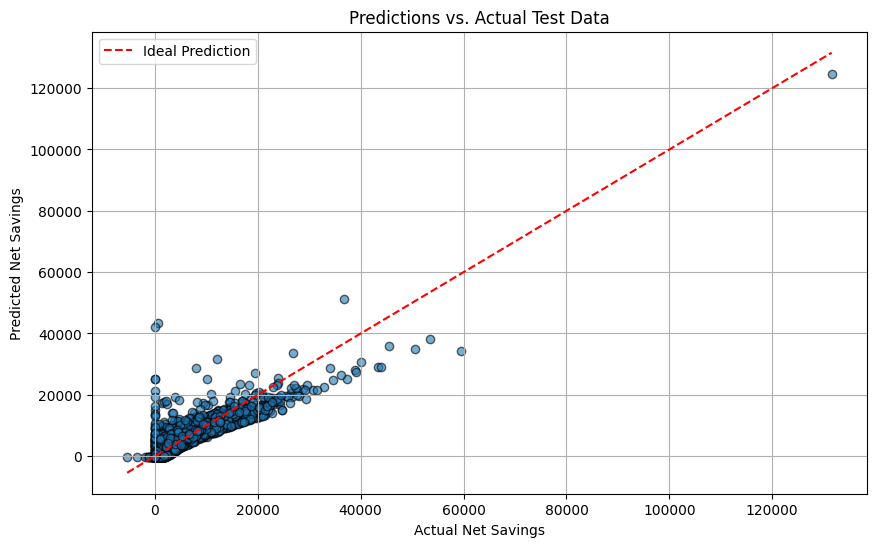

In [9]:
# Scatter plot of predictions versus actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Predictions vs. Actual Test Data')
plt.xlabel('Actual Net Savings')
plt.ylabel('Predicted Net Savings')
plt.legend()
plt.grid()
plt.show()


In [11]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
cv_scores = []

for train_idx, val_idx in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
    # Normalize the features
    X_scaler = MinMaxScaler()
    X_train_fold = X_scaler.fit_transform(X_train_fold)
    X_val_fold = X_scaler.transform(X_val_fold)
    
    # Build the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    
    # Train the model
    model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), 
              epochs=50, batch_size=32, verbose=0)
    
    # Evaluate on the validation fold
    y_val_pred = model.predict(X_val_fold)
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    cv_scores.append(rmse_fold)
    
    print(f"Fold {fold} RMSE: {rmse_fold:.4f}")
    fold += 1

# Calculate and print the average RMSE
mean_rmse = np.mean(cv_scores)
print(f"Average RMSE across folds: {mean_rmse:.4f}")


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
Fold 1 RMSE: 2514.7852


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
Fold 2 RMSE: 2520.2731


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
Fold 3 RMSE: 2655.6856


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
Fold 4 RMSE: 2660.8576


/mnt/ufs18/rs/CMSE_492_FS24_S001/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step
Fold 5 RMSE: 2558.0890
Average RMSE across folds: 2581.9381
